In [ ]:
%pip install --upgrade azure-ai-vision-face

## Load Azure Configuration

In [50]:
import os
azure_face_endpoint = os.environ["AZURE_FACE_ENDPOINT"]
azure_face_key = os.environ["AZURE_FACE_KEY"]

## Create Clients

In [76]:
import uuid

from azure.core.credentials import AzureKeyCredential
from azure.ai.vision.face import FaceAdministrationClient, FaceClient
from azure.ai.vision.face.models import FaceAttributeTypeRecognition04, FaceDetectionModel, FaceRecognitionModel, QualityForRecognition,  FaceAttributeTypeDetection03

face_admin_client = FaceAdministrationClient(endpoint=azure_face_endpoint, credential=AzureKeyCredential(azure_face_key))
face_client = FaceClient(endpoint=azure_face_endpoint, credential=AzureKeyCredential(azure_face_key))

## Helper Function

In [77]:
# Helper function
def read_file_content(file_path: str):
    with open(file_path, "rb") as fd:
        file_content = fd.read()
    return file_content


## Detect Faces

In [78]:
sample_file_path = "../Data/images/person_a1.jpg"

file_content = read_file_content(sample_file_path)

result = face_client.detect(
    file_content,
    detection_model=FaceDetectionModel.DETECTION03,  # The latest detection model.
    recognition_model=FaceRecognitionModel.RECOGNITION04,  # The latest recognition model.
    return_face_id=True,
    return_face_attributes=[
        FaceAttributeTypeDetection03.HEAD_POSE,
        FaceAttributeTypeDetection03.MASK,
        FaceAttributeTypeRecognition04.QUALITY_FOR_RECOGNITION,
    ],
    return_face_landmarks=True,
    return_recognition_model=True,
    face_id_time_to_live=120,
)

print(f"Detect faces from the file: {sample_file_path}")
for idx, face in enumerate(result):
    print(f"----- Detection result: #{idx+1} -----")
    print(f"Face: {face.as_dict()}")

Detect faces from the file: ../Data/images/person_a1.jpg
----- Detection result: #1 -----
Face: {'faceId': 'c0bd3ec6-164b-4413-b585-09744be345b9', 'faceRectangle': {'top': 85, 'left': 394, 'width': 197, 'height': 280}, 'faceLandmarks': {'pupilLeft': {'x': 441.6, 'y': 212.3}, 'pupilRight': {'x': 528.2, 'y': 194.0}, 'noseTip': {'x': 491.9, 'y': 252.3}, 'mouthLeft': {'x': 457.7, 'y': 299.4}, 'mouthRight': {'x': 550.0, 'y': 279.5}, 'eyebrowLeftOuter': {'x': 410.3, 'y': 188.2}, 'eyebrowLeftInner': {'x': 453.1, 'y': 176.5}, 'eyeLeftOuter': {'x': 425.4, 'y': 215.6}, 'eyeLeftTop': {'x': 442.2, 'y': 205.4}, 'eyeLeftBottom': {'x': 440.2, 'y': 218.0}, 'eyeLeftInner': {'x': 458.6, 'y': 210.4}, 'eyebrowRightInner': {'x': 500.8, 'y': 168.3}, 'eyebrowRightOuter': {'x': 553.7, 'y': 163.8}, 'eyeRightInner': {'x': 512.4, 'y': 200.0}, 'eyeRightTop': {'x': 524.3, 'y': 186.9}, 'eyeRightBottom': {'x': 530.6, 'y': 199.3}, 'eyeRightOuter': {'x': 545.4, 'y': 189.9}, 'noseRootLeft': {'x': 472.1, 'y': 211.0}, 'n

Detect faces from the file: ../Data/images/person_a1.jpg
----- Detection result: #1 -----
Face: {'faceId': 'c52021fa-365c-456c-94ea-4f8ee5052072', 'faceRectangle': {'top': 85, 'left': 394, 'width': 197, 'height': 280}, 'faceLandmarks': {'pupilLeft': {'x': 441.6, 'y': 212.3}, 'pupilRight': {'x': 528.2, 'y': 194.0}, 'noseTip': {'x': 491.9, 'y': 252.3}, 'mouthLeft': {'x': 457.7, 'y': 299.4}, 'mouthRight': {'x': 550.0, 'y': 279.5}, 'eyebrowLeftOuter': {'x': 410.3, 'y': 188.2}, 'eyebrowLeftInner': {'x': 453.1, 'y': 176.5}, 'eyeLeftOuter': {'x': 425.4, 'y': 215.6}, 'eyeLeftTop': {'x': 442.2, 'y': 205.4}, 'eyeLeftBottom': {'x': 440.2, 'y': 218.0}, 'eyeLeftInner': {'x': 458.6, 'y': 210.4}, 'eyebrowRightInner': {'x': 500.8, 'y': 168.3}, 'eyebrowRightOuter': {'x': 553.7, 'y': 163.8}, 'eyeRightInner': {'x': 512.4, 'y': 200.0}, 'eyeRightTop': {'x': 524.3, 'y': 186.9}, 'eyeRightBottom': {'x': 530.6, 'y': 199.3}, 'eyeRightOuter': {'x': 545.4, 'y': 189.9}, 'noseRootLeft': {'x': 472.1, 'y': 211.0}, 'n

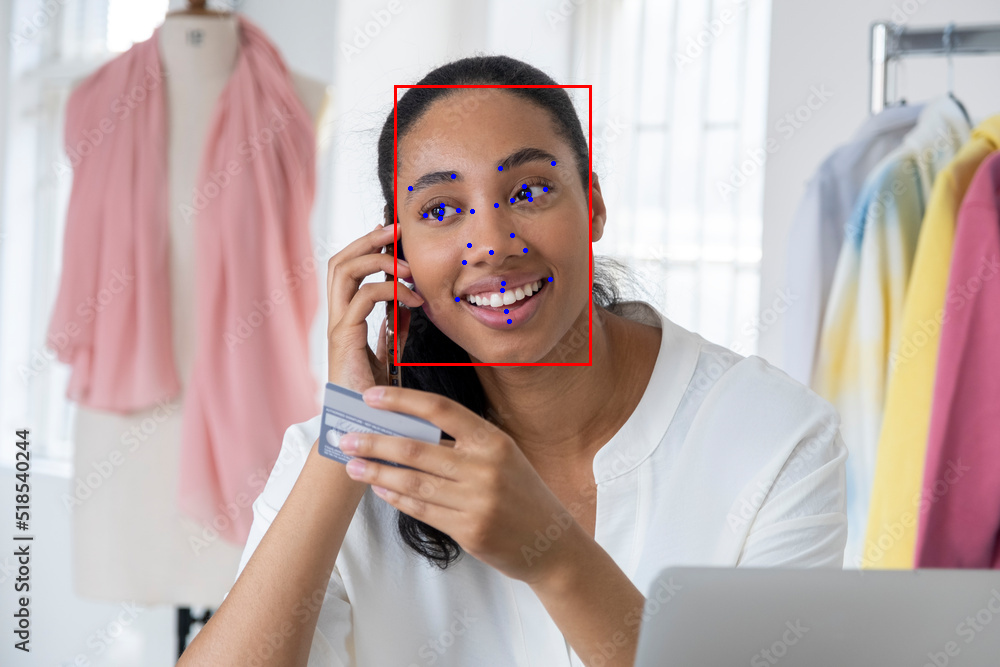

Face ID: c52021fa-365c-456c-94ea-4f8ee5052072
Face Rectangle: {'top': 85, 'left': 394, 'width': 197, 'height': 280}
Face Landmarks:
  pupilLeft: {'x': 441.6, 'y': 212.3}
  pupilRight: {'x': 528.2, 'y': 194.0}
  noseTip: {'x': 491.9, 'y': 252.3}
  mouthLeft: {'x': 457.7, 'y': 299.4}
  mouthRight: {'x': 550.0, 'y': 279.5}
  eyebrowLeftOuter: {'x': 410.3, 'y': 188.2}
  eyebrowLeftInner: {'x': 453.1, 'y': 176.5}
  eyeLeftOuter: {'x': 425.4, 'y': 215.6}
  eyeLeftTop: {'x': 442.2, 'y': 205.4}
  eyeLeftBottom: {'x': 440.2, 'y': 218.0}
  eyeLeftInner: {'x': 458.6, 'y': 210.4}
  eyebrowRightInner: {'x': 500.8, 'y': 168.3}
  eyebrowRightOuter: {'x': 553.7, 'y': 163.8}
  eyeRightInner: {'x': 512.4, 'y': 200.0}
  eyeRightTop: {'x': 524.3, 'y': 186.9}
  eyeRightBottom: {'x': 530.6, 'y': 199.3}
  eyeRightOuter: {'x': 545.4, 'y': 189.9}
  noseRootLeft: {'x': 472.1, 'y': 211.0}
  noseRootRight: {'x': 496.4, 'y': 205.1}
  noseLeftAlarTop: {'x': 469.2, 'y': 245.1}
  noseRightAlarTop: {'x': 512.8, 'y': 2

In [79]:
from PIL import Image, ImageDraw

sample_file_path = "../Data/images/person_a1.jpg"

file_content = read_file_content(sample_file_path)

result = face_client.detect(
    file_content,
    detection_model=FaceDetectionModel.DETECTION03,  # The latest detection model.
    recognition_model=FaceRecognitionModel.RECOGNITION04,  # The latest recognition model.
    return_face_id=True,
    return_face_attributes=[
        FaceAttributeTypeDetection03.HEAD_POSE,
        FaceAttributeTypeDetection03.MASK,
        FaceAttributeTypeRecognition04.QUALITY_FOR_RECOGNITION,
    ],
    return_face_landmarks=True,
    return_recognition_model=True,
    face_id_time_to_live=120,
)

print(f"Detect faces from the file: {sample_file_path}")
image = Image.open(sample_file_path)
draw = ImageDraw.Draw(image)

for idx, face in enumerate(result):
    print(f"----- Detection result: #{idx+1} -----")
    print(f"Face: {face.as_dict()}")
    
    # Draw bounding box
    rect = face.face_rectangle
    left = rect.left
    top = rect.top
    right = left + rect.width
    bottom = top + rect.height
    draw.rectangle([left, top, right, bottom], outline="red", width=3)
    
    # Draw landmarks
    for landmark in face.face_landmarks.as_dict().values():
        x, y = landmark['x'], landmark['y']
        draw.ellipse((x-2, y-2, x+2, y+2), fill="blue")

# Save or display the image with bounding boxes and landmarks
output_path = "../Data/images/person_a1_with_boxes_and_landmarks.jpg"
image.save(output_path)
image.show()

# Print all detection results per line
for face in result:
    print(f"Face ID: {face.face_id}")
    print(f"Face Rectangle: {face.face_rectangle.as_dict()}")
    print(f"Face Landmarks:")
    for landmark, position in face.face_landmarks.as_dict().items():
        print(f"  {landmark}: {position}")
    print(f"Face Attributes: {face.face_attributes.as_dict()}")
    print(f"Recognition Model: {face.recognition_model}")
    print()

## Create Large Person Group

In [80]:
# Used in the Large Person Group Operations and Delete Large Person Group examples.
# LARGE_PERSON_GROUP_ID should be all lowercase and alphanumeric. For example, 'mygroupname' (dashes are OK).
LARGE_PERSON_GROUP_ID = str(uuid.uuid4())  # assign a random ID (or name it anything)

# Create a Large Person Group
print("Person group:", LARGE_PERSON_GROUP_ID)
face_admin_client.large_person_group.create(
    large_person_group_id=LARGE_PERSON_GROUP_ID,
    name=LARGE_PERSON_GROUP_ID,
    recognition_model=FaceRecognitionModel.RECOGNITION04,
)

Person group: d50cb4b7-9294-4fec-bccf-147d678534f6


## Add Persons to Groups

In [81]:
# Define person
person_A = face_admin_client.large_person_group.create_person(
    large_person_group_id=LARGE_PERSON_GROUP_ID,
    name="Person A",
)

# Images
person_A_image_file_path = [
    "../Data/images/person_a1.jpg",
    "../Data/images/person_a2.jpg",
]

for image in person_A_image_file_path:

    file_content = read_file_content(image)

    # Check if the image is of sufficient quality for recognition.
    result = face_client.detect(
        file_content,
        detection_model=FaceDetectionModel.DETECTION03,  # The latest detection model.
        recognition_model=FaceRecognitionModel.RECOGNITION04,  # The latest recognition model.
        return_face_id=True,
        return_face_attributes=[FaceAttributeTypeRecognition04.QUALITY_FOR_RECOGNITION]
    )

    # Ensure only one face is detected and it has high quality for recognition
    if len(result) == 1 and result[0].face_attributes.quality_for_recognition == QualityForRecognition.HIGH:
        face_admin_client.large_person_group.add_face(
            LARGE_PERSON_GROUP_ID,
            person_A.person_id,
            file_content,
            detection_model=FaceDetectionModel.DETECTION03,        
    )
        print(f"Face {result[0].face_id} added to person {person_A.person_id}")



Face 8fe35b84-a171-49e8-995f-c5524ed56662 added to person 65028fb8-78e1-4dd1-b2b1-c16701ab318b
Face edfffa32-452c-4bb4-8c1e-4cf7b8155b20 added to person 65028fb8-78e1-4dd1-b2b1-c16701ab318b


In [82]:
# Define woman friend
person_B = face_admin_client.large_person_group.create_person(
    large_person_group_id=LARGE_PERSON_GROUP_ID,
    name="Person B",
)

# Images
person_B_image_file_path = [
    "../Data/images/person_b1.jpg",
    "../Data/images/person_b2.jpg",
]

for image in person_B_image_file_path:

    file_content = read_file_content(image)

    # Check if the image is of sufficient quality for recognition.
    result = face_client.detect(
        file_content,
        detection_model=FaceDetectionModel.DETECTION03,  # The latest detection model.
        recognition_model=FaceRecognitionModel.RECOGNITION04,  # The latest recognition model.
        return_face_id=True,
        return_face_attributes=[FaceAttributeTypeRecognition04.QUALITY_FOR_RECOGNITION]
    )

    # Ensure only one face is detected and it has high quality for recognition
    if len(result) == 1 and result[0].face_attributes.quality_for_recognition == QualityForRecognition.HIGH:
        face_admin_client.large_person_group.add_face(
            LARGE_PERSON_GROUP_ID,
            person_B.person_id,
            file_content,
            detection_model=FaceDetectionModel.DETECTION03,        
    )
        print(f"Face {result[0].face_id} added to person {person_B.person_id}")



Face 8c1ffa05-ba1a-423b-9266-b68890f70302 added to person c7388805-e556-408d-b7e0-de1b67924428
Face 7159ffd0-9c15-43a5-bd98-c91c44850d48 added to person c7388805-e556-408d-b7e0-de1b67924428


## Train the Large Person Group

In [83]:
# Train the large person group and set the polling interval to 5s
print(f"Train the person group {LARGE_PERSON_GROUP_ID}")
poller = face_admin_client.large_person_group.begin_train(
    large_person_group_id=LARGE_PERSON_GROUP_ID,
    polling_interval=5,
)

poller.wait()
print(f"The person group {LARGE_PERSON_GROUP_ID} is trained successfully.")

Train the person group d50cb4b7-9294-4fec-bccf-147d678534f6
The person group d50cb4b7-9294-4fec-bccf-147d678534f6 is trained successfully.


## Identify Faces in Images

In [88]:
# Group image for testing against
image="../Data/images/group_1.jpg"
file_content = read_file_content(image)


# Detect faces
face_ids = []
# We use detection model 03 to get better performance, recognition model 04 to support quality for recognition attribute.
# Check if the image is of sufficient quality for recognition.
faces = face_client.detect(
    file_content,
    detection_model=FaceDetectionModel.DETECTION03,  # The latest detection model.
    recognition_model=FaceRecognitionModel.RECOGNITION04,  # The latest recognition model.
    return_face_id=True,
    return_face_attributes=[FaceAttributeTypeRecognition04.QUALITY_FOR_RECOGNITION]
)

for face in faces:
    # Only take the face if it is of sufficient quality.
    if face.face_attributes.quality_for_recognition != QualityForRecognition.LOW:
        face_ids.append(face.face_id)

# Identify faces
identify_results = face_client.identify_from_large_person_group(
    face_ids=face_ids,
    large_person_group_id=LARGE_PERSON_GROUP_ID,
)
print("Identifying faces in image")
for identify_result in identify_results:
    if identify_result.candidates:
        print(f"Person is identified for face ID {identify_result.face_id} in image, with a confidence of "
              f"{identify_result.candidates[0].confidence}.")  # Get topmost confidence score

    # Verify faces
        verify_result = face_client.verify_from_large_person_group(
            face_id=identify_result.face_id,
            large_person_group_id=LARGE_PERSON_GROUP_ID,
            person_id=identify_result.candidates[0].person_id,
        )
        print(f"Person Identified: {identify_result.candidates[0].person_id}. Verification result: {verify_result.is_identical}. confidence: {verify_result.confidence}")
    else:
        print(f"No person identified for face ID {identify_result.face_id} in image.")


Identifying faces in image
Person is identified for face ID e5490339-4d48-4f3a-9d64-92cb172a6e64 in image, with a confidence of 0.94943.
Person Identified: 65028fb8-78e1-4dd1-b2b1-c16701ab318b. Verification result: True. confidence: 0.94943
Person is identified for face ID 22ee80c6-9b68-475b-a2a8-22b7f6404316 in image, with a confidence of 0.94357.
Person Identified: c7388805-e556-408d-b7e0-de1b67924428. Verification result: True. confidence: 0.94357


## Clean up resources

In [89]:
# Delete the large person group
face_admin_client.large_person_group.delete(LARGE_PERSON_GROUP_ID)
print(f"The person group {LARGE_PERSON_GROUP_ID} is deleted.")

The person group d50cb4b7-9294-4fec-bccf-147d678534f6 is deleted.
